In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings(action="ignore")

In [2]:
# Load the data
data = pd.read_csv("/content/drive/MyDrive/Coffee Analytics/Task 1/clustering_test_work.csv", index_col = 0).drop("num", axis = 1)

In [3]:
data.head()

,actual_id,period_end,revenue_lastyear,quantity_lastyear,orders_lastyear,orders_refund,ratio_not_dh,ratio_online,ratio_refund,avg_ratio_purchase,quantity_1st_period,unigenders,recency,aov
0,12013601421,2021-02-19,17920.0,4,1,0,1.0,1.0,0.0,0.8,4.0,1,123,17920.0
1,12013601421,2021-04-19,17920.0,4,1,0,1.0,1.0,0.0,0.8,4.0,1,182,17920.0
2,12013601421,2021-06-19,17920.0,4,1,0,1.0,1.0,0.0,0.8,4.0,1,243,17920.0
3,12013601421,2021-08-19,17920.0,4,1,0,1.0,1.0,0.0,0.8,4.0,1,304,17920.0
4,12013601421,2021-10-19,17920.0,4,1,0,1.0,1.0,0.0,0.8,4.0,1,365,17920.0


### Exploratory Data Analysis

In [4]:
# Find duplicates
data.duplicated().sum()

0

In [5]:
# Find null values
data.isnull().sum()

actual_id              0
period_end             0
revenue_lastyear       0
quantity_lastyear      0
orders_lastyear        0
orders_refund          0
ratio_not_dh           0
ratio_online           0
ratio_refund           0
avg_ratio_purchase     0
quantity_1st_period    0
unigenders             0
recency                0
aov                    0
dtype: int64

In [6]:
# Remove unnecessary columns
df = data.drop(["actual_id", "period_end"], axis = 1)

In [7]:
# Basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2247574 entries, 0 to 2247573
Data columns (total 12 columns):
 #   Column               Dtype  
---  ------               -----  
 0   revenue_lastyear     float64
 1   quantity_lastyear    int64  
 2   orders_lastyear      int64  
 3   orders_refund        int64  
 4   ratio_not_dh         float64
 5   ratio_online         float64
 6   ratio_refund         float64
 7   avg_ratio_purchase   float64
 8   quantity_1st_period  float64
 9   unigenders           int64  
 10  recency              int64  
 11  aov                  float64
dtypes: float64(7), int64(5)
memory usage: 222.9 MB


In [8]:
# Describe the data
df.describe().drop("count", axis = 0)

,revenue_lastyear,quantity_lastyear,orders_lastyear,orders_refund,ratio_not_dh,ratio_online,ratio_refund,avg_ratio_purchase,quantity_1st_period,unigenders,recency,aov
mean,3.099290e+04,3.321365,2.006601,0.123220,0.776133,0.238901,0.037048,0.964927,2.289252,1.038383,239.608064,11872.204596
std,6.037296e+04,6.016230,3.069162,0.690514,0.401444,0.383890,0.155441,0.145892,2.412920,0.192118,179.100308,12025.676137
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,3.980000e+03,1.000000,1.000000,0.000000,0.834163,0.000000,0.000000,1.000000,1.000000,1.000000,114.000000,3480.000000
50%,1.398000e+04,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,184.000000,9980.000000
75%,3.492000e+04,4.000000,2.000000,0.000000,1.000000,0.500000,0.000000,1.000000,3.000000,1.000000,363.000000,16241.500000
max,7.365842e+06,629.000000,281.000000,126.000000,1.000000,1.000000,1.000000,1.000000,138.000000,2.000000,827.000000,430790.000000


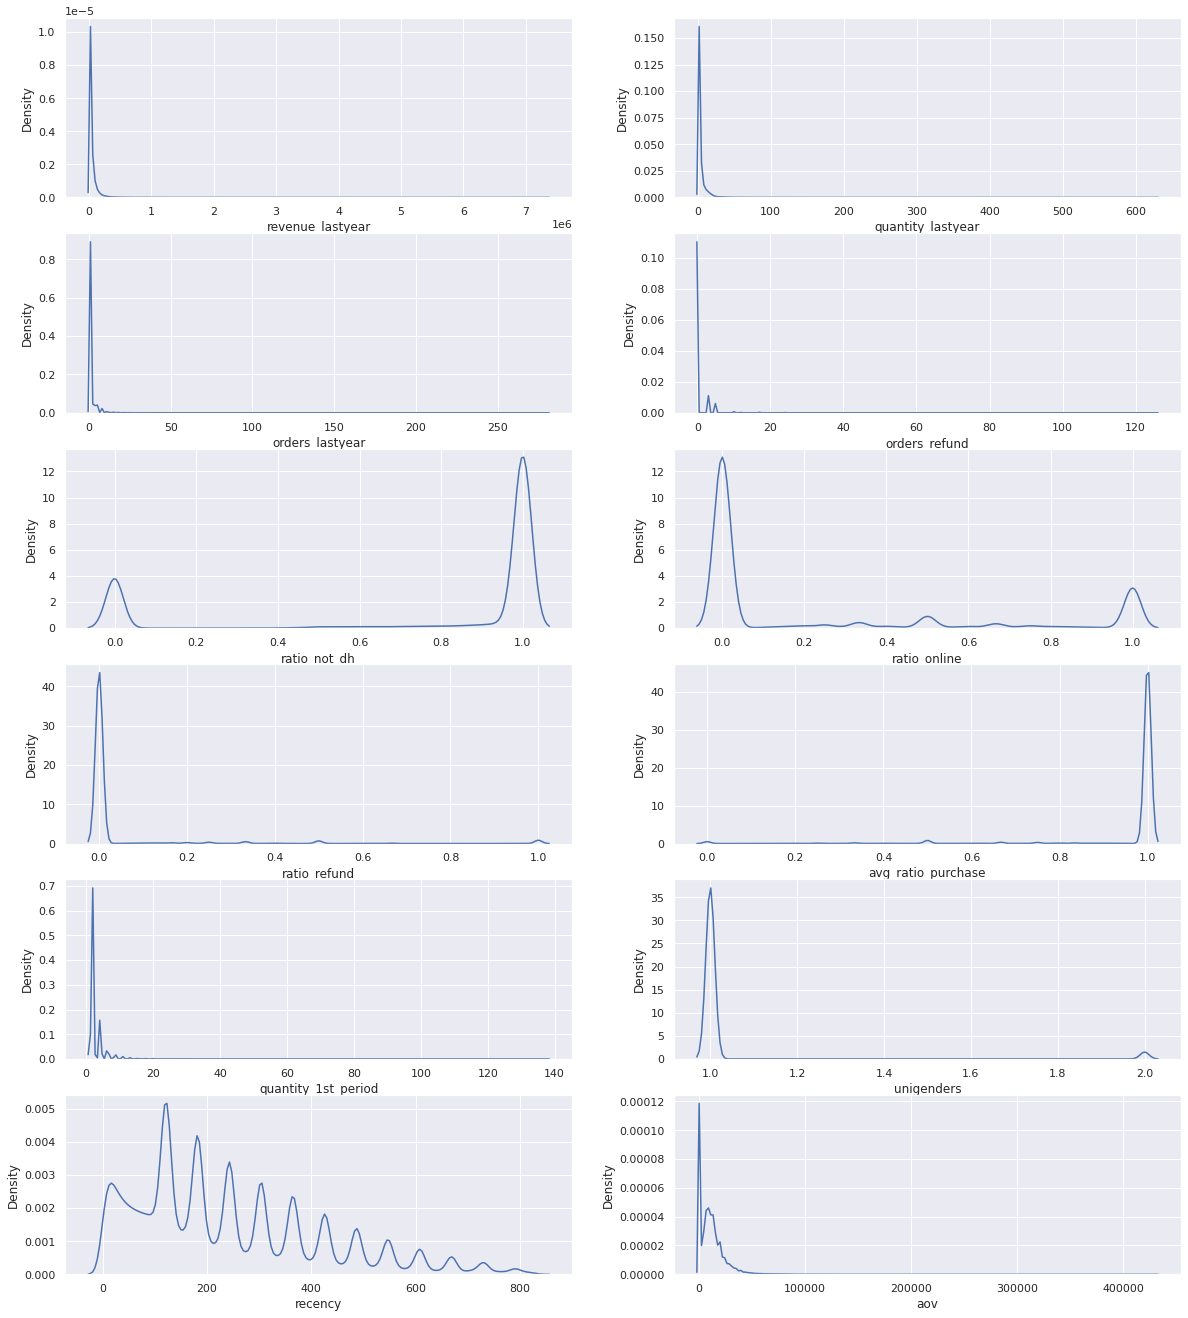

In [97]:
# Check for outliers
plt.figure(figsize=(20,35))
for i, col in enumerate(df.columns):
  ax = plt.subplot(9, 2, i+1)
  sns.kdeplot(df[col], ax=ax)
  plt.xlabel(col)     
plt.show()

As we can see from the above plots, data for almost all features is skewed, meaning there are many outliers. For the purposes of this task, outliers were not handled in any way because we want the model to reflect these 'anomalies'.

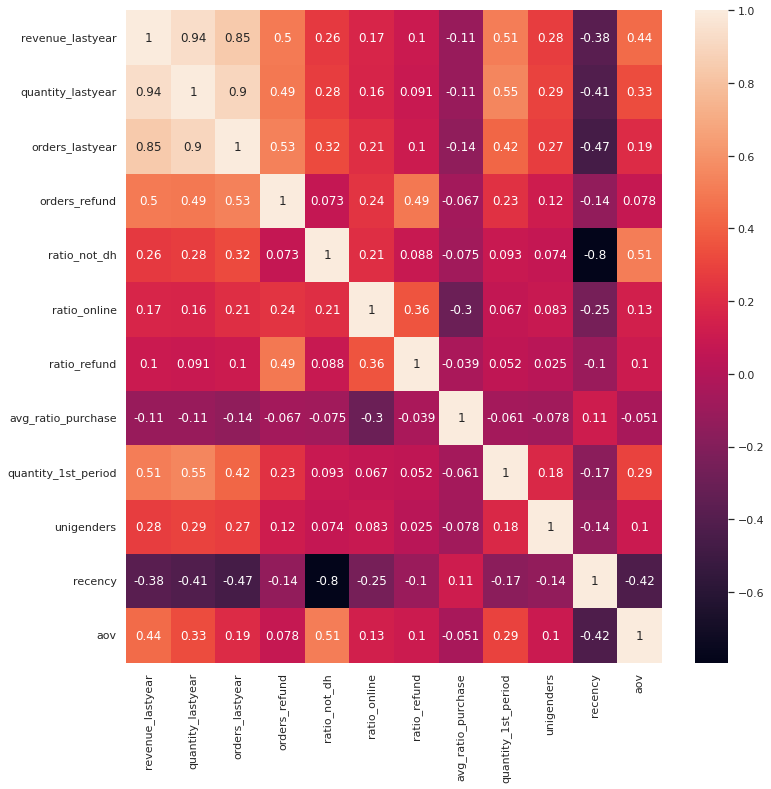

In [98]:
# Correlation between features
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

The correlation matrix shows that `quantity_lastyear` - `revenue_lastyear`, `orders_lastyear` - `revenue_lastyear`, `orders_lastyear` - `quantity_lastyear` `and recency` - `ratio_not_dh` are highly correlated. Since clustering is not affected by linearity these correlations also were not handled in any way.

### Clustering

In [99]:
# Scale data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [110]:
n_clusters = 10
cost = []

for i in range(1, n_clusters):
    kmean= KMeans(i)
    kmean.fit(df_scaled)
    cost.append(kmean.inertia_)

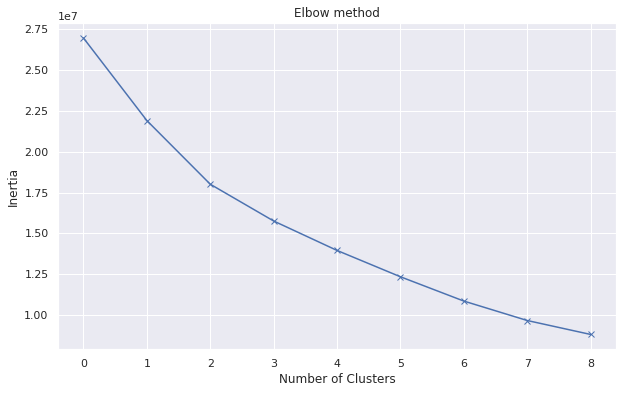

In [111]:
# Visualize cluster "elbow"
plt.figure(figsize=(10,6))
plt.plot(cost, 'bx-')
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [112]:
# Choose k = 3
kmean = KMeans(3)
kmean.fit(df_scaled)
labels = kmean.labels_

In [128]:
data['group'] = labels

### Customer Profile

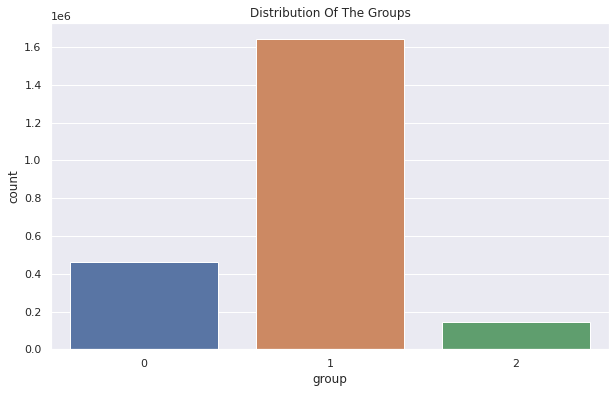

In [114]:
# Plotting countplot of clusters
plt.figure(figsize=(10,6))
sns.countplot(x = data["group"])
plt.title("Distribution Of The Groups")
plt.show()

In [118]:
# Identifying patterns among different groups
features = ['revenue_lastyear', 'recency', 'aov']
data.groupby("group")[features].mean()

,revenue_lastyear,recency,aov
group,,,
0,0.125084,524.948955,0.125084
1,26647.252484,174.959825,14227.995566
2,181825.928927,62.505909,23107.472982


In [134]:
data['group'] = data['group'].map({0: 'cold', 1: 'warm', 2: 'hot'})

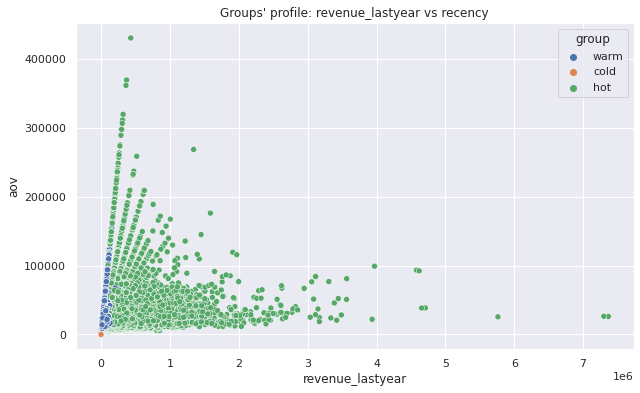

In [121]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x='revenue_lastyear', y='aov', hue='group')
plt.title("Groups' profile: revenue_lastyear vs aov")
plt.show()

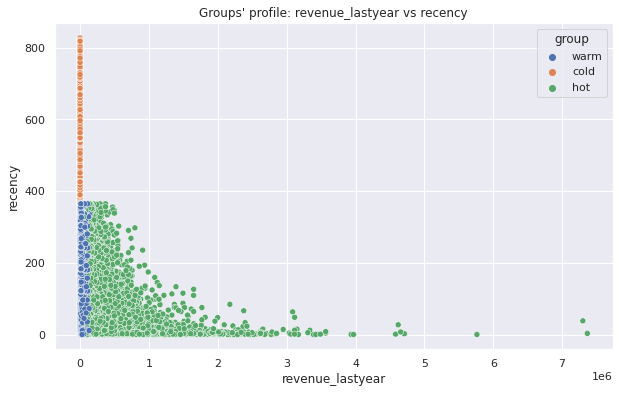

In [122]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x='recency', y='revenue_lastyear', hue='group')
plt.title("Groups' profile: revenue_lastyear vs recency")
plt.show()

In [125]:
data.groupby("group").mean().drop('unigenders', axis=1)

,revenue_lastyear,quantity_lastyear,orders_lastyear,orders_refund,ratio_not_dh,ratio_online,ratio_refund,avg_ratio_purchase,quantity_1st_period,recency,aov
group,,,,,,,,,,,
cold,0.125084,0.000065,0.000059,0.000000,0.000020,0.025088,0.000000,0.990126,1.850943,524.948955,0.125084
hot,181825.928927,18.924981,9.568990,1.004681,0.974206,0.470024,0.104501,0.894231,6.636048,62.505909,23107.472982
warm,26647.252484,2.904062,1.915542,0.081602,0.976474,0.278842,0.041602,0.963973,2.036575,174.959825,14227.995566


Customers Profile

Group 0 (cold):
- `revenue_lastyear` -- bring the smallest revenue
- `recency` -- buy rarely
- `aov` -- average check is extremely low
- `orders_refund` -- do not request a refund
- `ration_online` -- very small number of people order online

Group 1 (warm): 
- `revenue_lastyear` -- bring good revenue
- `recency` -- buy occasionally
- `aov` -- average check is decent
- `orders_refund` -- rarely request a refund
- `ration_online` -- few people order online

Group 2 (hot): 
- `revenue_lastyear` -- bring the most revenue
- `recency` -- buy frequently
- `aov` -- average check is the highest
- `orders_refund` -- frequently request a refund
- `ration_online` -- half of the people order online






### Churn Analysis

In [10]:
# Number of unique customers
len(data['actual_id'].unique())

302119

In [170]:
unique_customers = data['actual_id'].unique()
churn, prechurn = 0, 0

for customer in unique_customers:
  customer_df = data[data['actual_id']==customer]
  customer_df.sort_values('period_end', inplace = True)
  # customer is now 'cold' but previously was 'hot' or 'warm'
  if (customer_df['group'].iloc[-1] == 'cold' and ('warm' in list(customer_df['group'].iloc[:-1]) or 
                                                   'hot' in list(customer_df['group'].iloc[:-1]))):
    churn += 1
  # customer is now 'warm' but previously was 'hot'
  if (customer_df['group'].iloc[-1] == 'warm') and ('hot' in list(customer_df['group'].iloc[:-1])):
    prechurn += 1

In [175]:
print("Number of churned customers =", churn)
print("Number of customers about to churn =", prechurn)

Number of churned customers = 119363
Number of customers about to churn = 9039
